# 1. Identification des différents chemins des fichiers

In [15]:
import tensorflow as tf
import keras 
import pandas as pd
import seaborn as sns
import numpy as np
import os
import lime
import shape
import eli5

In [23]:
# Les différents chemin pour retouver les fichiers images ainsi que le chemin des fichiers des différentes classes

image_dir='/home/titon/Documents/Projet_France_Relance-20220311T093327Z-001/Projet_France_Relance/cell_images'
uninfected='/home/titon/Documents/Projet_France_Relance-20220311T093327Z-001/Projet_France_Relance/cell_images/Uninfected'
parasitized='/home/titon/Documents/Projet_France_Relance-20220311T093327Z-001/Projet_France_Relance/cell_images/Parasitized'

In [24]:
classes=os.listdir(image_dir)

In [25]:
print(classes)

['Parasitized', 'Uninfected']


In [26]:
# Pour lire les images 
from matplotlib.image import imread

In [27]:
## pour voir à quoi ressemble les images depuis le chemin
# liste de tout les fichiers images au format png
para_path=image_dir + '/Parasitized'
noninf_path=image_dir + '/Uninfected'

In [28]:
noninf_path

'/home/titon/Documents/Projet_France_Relance-20220311T093327Z-001/Projet_France_Relance/cell_images/Uninfected'

In [29]:
para_path

'/home/titon/Documents/Projet_France_Relance-20220311T093327Z-001/Projet_France_Relance/cell_images/Parasitized'

In [64]:
# la fonction os.listdir: liste toute les images
os.listdir(noninf_path)

['C119P80ThinF_IMG_20151002_123608_cell_94.png',
 'C156P117ThinF_IMG_20151115_154022_cell_64.png',
 'C68P29N_ThinF_IMG_20150819_133447_cell_22.png',
 'C131P92ThinF_IMG_20151004_145302_cell_55.png',
 'C67P28N_ThinF_IMG_20150819_121053_cell_176.png',
 'C161P122ThinF_IMG_20151116_100724_cell_26.png',
 'C147P108ThinF_IMG_20151115_092605_cell_221.png',
 'C143P104ThinF_IMG_20151005_230100_cell_1.png',
 'C180P141NThinF_IMG_20151201_163751_cell_112.png',
 'C128P89ThinF_IMG_20151004_130810_cell_67.png',
 'C188P149ThinF_IMG_20151203_135433_cell_18.png',
 'C67P28N_ThinF_IMG_20150819_121053_cell_140.png',
 'C170P131ThinF_IMG_20151119_120150_cell_121.png',
 'C52P13thinF_IMG_20150725_130013_cell_152.png',
 'C42P5thin_original_IMG_20150623_134547_cell_160.png',
 'C240ThinF_IMG_20151127_115223_cell_121.png',
 'C185P146ThinF_IMG_20151203_110933_cell_220.png',
 'C63P24N_ThinF_IMG_20150818_143319_cell_48.png',
 'C125P86ThinF_IMG_20151004_102132_cell_74.png',
 'C103P64ThinF_IMG_20150918_164250_cell_15.png

In [31]:
len(os.listdir(noninf_path))

13780

In [32]:
# pour voir le chemin de la première image de la cellule non infecté
os.listdir(noninf_path)[0]

'C119P80ThinF_IMG_20151002_123608_cell_94.png'

In [33]:
# pour voir le chemin de la première image de la cellule non infecté
os.listdir(para_path)[0]

'C82P43ThinF_IMG_20150817_124728_cell_28.png'

In [34]:
# determination du chemin exacte
para_cell=para_path+'/C82P43ThinF_IMG_20150817_124728_cell_28.png'
noninf_cell=noninf_path+'/C156P117ThinF_IMG_20151115_154022_cell_64.png'


In [35]:
para_cell

'/home/titon/Documents/Projet_France_Relance-20220311T093327Z-001/Projet_France_Relance/cell_images/Parasitized/C82P43ThinF_IMG_20150817_124728_cell_28.png'

In [36]:
noninf_cell

'/home/titon/Documents/Projet_France_Relance-20220311T093327Z-001/Projet_France_Relance/cell_images/Uninfected/C156P117ThinF_IMG_20151115_154022_cell_64.png'

In [36]:
# Pour lire les images  utilisation de imread() plus le chemin exacte de l'image
# ce qui transforme l'image au format png en tableau numpy
# on a une image de 121 par 121 pixels et 3 canaaux de couleurs
imread(noninf_cell).shape

(115, 136, 3)

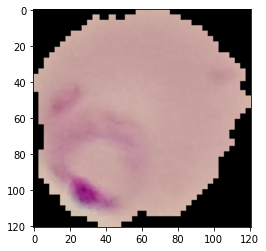

In [37]:
import matplotlib.pyplot as plt
# Pour voir la cellule infectée, utilisation de plt.imshow()
plt.imshow(imread(para_cell))

# on note une petite tache foncée qui représente la partie infectée de la céllule

In [38]:
# pour une cellule non infectée
imread(noninf_cell).shape

(115, 136, 3)

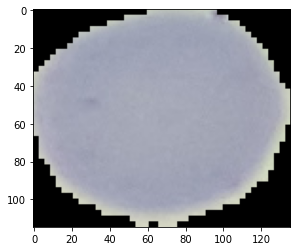

In [39]:
# pour voir la cellule non infectée
plt.imshow(imread(noninf_cell))

In [73]:
# Pour voir le nombre d'image pour les cellules infectées par exemple
len(os.listdir(para_path))

13780

In [ ]:
# les images réelles peuvent être de différentes dimensions
# Pour voir la taille moyenne(la forme) de ces images
# on itère à travers tous les fichiers images du dossier des cellules non infectées 
# ensuite vérification de la forme ou la taille de chaque image avec l'attibut .shape
# enfin enregistrment de la 1ère dimension et la seconde d dans les listes de dimension dim1 et dim2

dim1=[]
dim2=[]

for image_filename in os.listdir(para_path):
    img=imread(para_path +'/' + image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
# histogramme de ces deux dimensions pour voir leur variation
# il faut redimensionner toutes ces images pour quelle soit de même taille 
# Utilisation de la moyenne pour fixer la dimension du CNN
#(130,130,3)
# si par ex plus petite photo,cela va ajouter du padding ou du rembourage des pixels autour de l'image
#si grande photo,
sns.jointplot(dim1,dim2)
np.mean(dim1)

# ImageDataGenerator
 - cette classe permet d'alimenter depuis le répertoire où se trouve réellement les images des batchs(lot) d'image
 - idéé de manipulation des imgages depuis le répertoire de fichiers

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, # Faire pivoter l'image de 20 degrés
                               width_shift_range=0.10, # Modifier la largeur de la photo de 10% maximum
                               height_shift_range=0.10, # Modifier la hauteur de la photo de 10% maximum
                               # rescale=1/255, # Redimensionner l'image en la normalisant
                               shear_range=0.1, # shear signifie couper une partie de l'image (max 10%)
                               zoom_range=0.1, # Zoom de 10% maximum
                               horizontal_flip=True, # Autorise le basculement horizontal
                               fill_mode='nearest' # Remplir les pixels manquants avec la valeur remplie la plus proche
                              )

# Genération du dataset d'entrainement et de validation à partir de ImageDataGenerator

In [16]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense

In [73]:
# Données d'entraînement
batch_size=16
image_size=(130,130)
train_data= tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                   validation_split=0.2,
                                                                   subset='training',
                                                                   interpolation='nearest',
                                                                   image_size=image_size,
                                                                   color_mode='rgb',
                                                                   seed=101,
                                                                   label_mode='binary',
                                                                   batch_size=batch_size,
)                                                                                  


Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [74]:
# Données de validation
test_data= tf.keras.preprocessing.image_dataset_from_directory(image_dir,
                                                                   validation_split=0.2,
                                                                   interpolation='nearest',
                                                                   subset='validation',
                                                                   image_size=image_size,
                                                                   color_mode='rgb',
                                                                   seed=101,
                                                                   label_mode='binary',
                                                                   shuffle=False,
                                                                   batch_size=batch_size,
)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


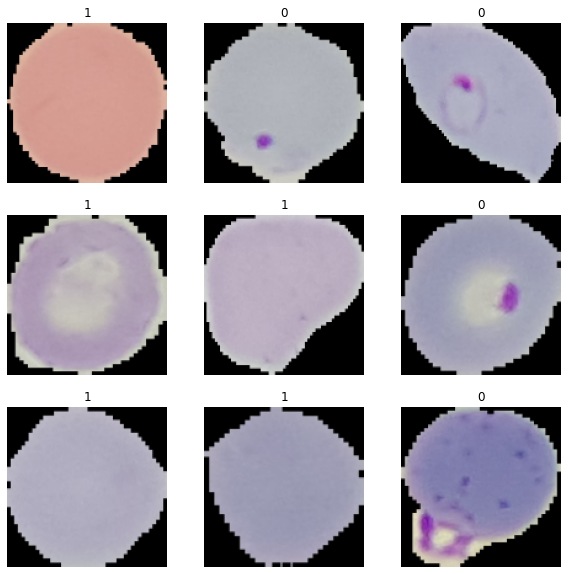

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [26]:
# Import des librairies 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Activation,Dropout


# Construction du modèle de réseau de neuronne convolutif

In [28]:
# Dimension moyenne des images dans le dataset
image_shape=(130,130,3)

model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# couche droptout permettant de contrôler l'overfitting

model.add(Dropout(0.5))

# Cas d'une classification binaire, pour la dernière couche utilisation de la sigmoïde

model.add(Dense(1,activation='sigmoid'))

# compilation du modèle

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [29]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

# Earlystopping: Mécanisme d'arrêt anticipé

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

# Entraînement du modèle

In [ ]:
help(image_gen.flow_from_directory)

In [43]:
results = model.fit(train_data,epochs=20,
                              validation_data=test_data,
                             callbacks=[early_stop])

Epoch 1/20


2022-04-01 16:00:23.171262: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-01 16:00:23.232243: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


1378/1378 [==============================] - 528s 379ms/step - loss: 2.1208 - accuracy: 0.5644 - val_loss: 0.6006 - val_accuracy: 0.6935
Epoch 2/20
1378/1378 [==============================] - 489s 354ms/step - loss: 0.6592 - accuracy: 0.6197 - val_loss: 0.6582 - val_accuracy: 0.6093
Epoch 3/20
1378/1378 [==============================] - 558s 404ms/step - loss: 0.6409 - accuracy: 0.6365 - val_loss: 0.6693 - val_accuracy: 0.5832


In [45]:
model.save('my_model_cnn.h5')

In [20]:
from tensorflow.keras.models import load_model
model1=load_model('my_model_cnn.h5')

2022-04-06 09:16:23.781554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-06 09:16:23.800807: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-06 09:16:23.822181: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hprisser): /proc/driver/nvidia/version does not exist
2022-04-06 09:16:24.001703: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Evaluation du modèle

In [21]:
model1.metrics_names

['loss', 'accuracy']

In [44]:
model1.evaluate(test_data)

345/345 [==============================] - 16s 44ms/step - loss: 0.6693 - accuracy: 0.5832


[0.669266939163208, 0.5831972360610962]

In [45]:
model1.evaluate(train_data)

1378/1378 [==============================] - 95s 69ms/step - loss: 0.6075 - accuracy: 0.6734


[0.607490599155426, 0.6734249591827393]

In [48]:
# Calcul des probabilités de classification
pred_probabilities = model1.predict(test_data)

In [69]:
pred_probabilities

array([[0.6349845 ],
       [0.7566862 ],
       [0.38914442],
       ...,
       [0.50175583],
       [0.436036  ],
       [0.3862331 ]], dtype=float32)

In [75]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 130, 130, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [71]:
predictions=pred_probabilities>0.5

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
model.input_shape

(None, 130, 130, 3)

# Explicabilité du modèle

In [16]:
from lime import lime_image


In [17]:
explainer=lime_image.LimeImageExplainer(random_state=42)

In [ ]:
# redimensionner l'image pour le caliber au dimension de notre modèle : (130,130,3)
image=para_cell.reshape(1,130,130)

In [ ]:
explanation=explainer.explain_instance(.astype('double'), model.predict,top_labels=2, hide_color=0, num_samples=1000 )